<a href="https://colab.research.google.com/github/blosshaus/M4CNNS/blob/main/1.%20Simple_neural_network_for_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
![Practice](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Practice.png)

Recap: Last session we discussed the simple fully connected neural network and how to use it to do 10 class digit recognition. Now we are going to use a different dataset to do a simple practice. Now let's dive in to the practice!


![GettingStarted](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_GettingStarted.png)
#[Step 1] **READ**: Simple Fashion Goods Recognition with Neural Network
# **Objective**
#### Train your neural network: Image classification for retail products

You will implement a model to classify the images of retail products (predict and label the images in 10 classes such as dress, coat, or shirt).

#[Step 2] **RUN**: Setting Up the Colab Environment

**Importing Packages**

Python packages enable different functions, providing easy ways of manipulating data and building models. As a first step, we 'import' packages to set up our environment in a way that allows us to take advantage of different capabilities.

Import the necessary libraries and print the version of TensorFlow API:

In [5]:
# TensorFlow and tf.keras
%tensorflow_version 2.18.0
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.18.0



**Loading Dataset**
<br>
Next we need to load the Fashion MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In this case, since our dataset is in grey scale, the pixel dimension is set to 1.

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. The following are some examples of the images (each image is 28 x 28 pixels):

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Import and load the data from TensorFow (the data is already split into test and training sets):

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# train_images.shape

**Data Overview**
<br>
So let's see what kind of pictures and classes are in this fashion dataset
The *images* are defined as pixel values ranging between 0 and 255 (each image with 28x28=784 values). These values correspond to a shade of gray:

<table>
  <tr><td>
    <img src="http://what-when-how.com/wp-content/uploads/2012/07/tmp26dc25_thumb2.png"
         alt="Shades of grey" width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> 256 (not 50) shades of grey.<br/>&nbsp;
  </td></tr>
</table>

The *labels* are integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Assign *class names* to the labels (we will use the class names later when plotting the images):

In [7]:
#Assign the class names that are correspond to each label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']





**Explore the data**

Explore the format of the **training** dataset (60,000 images with each image is represented as 28 x 28 pixels):

In [8]:
# View the shape of the training images ((TRAINING X))
train_images.shape

(60000, 28, 28)

Explore the labels of the **training** dataset (each label is an integer between 0 and 9):

In [9]:
# View the labels from the train set ((TRAINING Y)) The labels has digits vary from 0 to 9 to correspond with each clothes item
# See the image above
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Explore the format of the **test** dataset (10,000 images with each image is represented as 28 x 28 pixels):

In [10]:
# View the shape of the testing images
test_images.shape

(10000, 28, 28)

Explore the labels of the **test** dataset (each label is an integer between 0 and 9):

In [11]:
# View the labels from the test set. ###Only training it once is a objective test of the model
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**Preprocess the data**

See how a sample image looks like (28 by 28 pixels, each pixel having a value between 0 and 255):

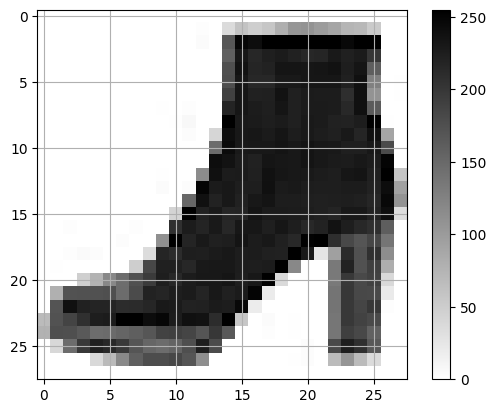

In [12]:
# We are going to display the first image in the dataset
plt.figure()
plt.imshow(train_images[27776],cmap=plt.cm.binary)
plt.colorbar() #display the color bar to see the grey scale
plt.grid(True
         )

**Normalization**
<br>
Then we normalize the pixel values to the range 0 and 1 for both the **training** and **test** datasets (this is how the neural network model expects the input):

Dividing all Pixals by 255 normalizing pixels into cero mean andunit vriance - restores learnability into mu scaling^(K) and bet(K) Shoifting

In [13]:
train_images = train_images / 255.0 ## 255 as convention

test_images = test_images / 255.0

Confirm that the pixel values are now between 0 and 1:

Quick note: Check the color bar and spot the difference


Scales all Pixels from zero to 1


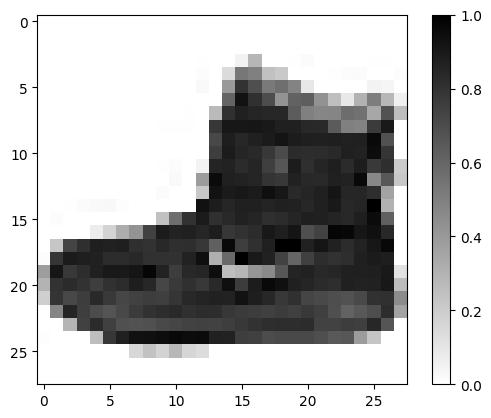

In [14]:
# Display normalized image
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

**Examine some of the images in the dataset**
<br>
Display the first 25 images from the *training set* with the class name below each image and verify that the data looks good:

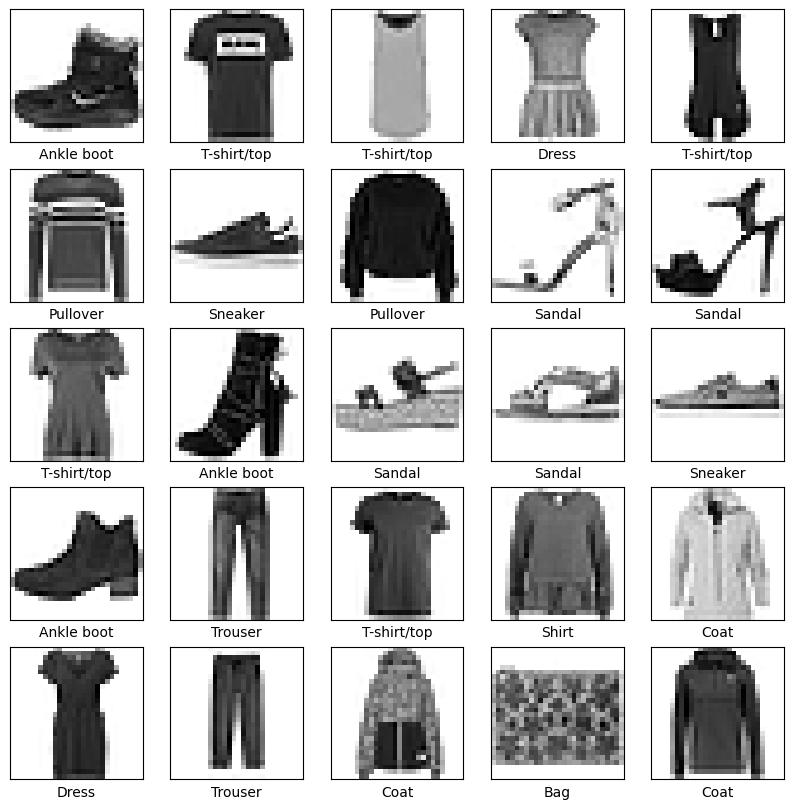

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

After checking the data, we are going to build the neural network which requires
1. setting up the layers of the model
2. compiling the model

#[Step 3] **RUN**: Setting Up the Neural Network Architecture

**Design the neural network architecture**

The basic building block of a neural network is the *layer*. Layers extract representations from the data. Create three layers:



1. First, we are going to create the model framework.
2. Next we will add the flatten later which we can input an image that is 28 * 28. This layer will flatten the image to a vector so we can pass it in to the neural network. Each pixel of the image will become an individual input that feeds in the next hidden layer
3. The next layer is a fully connected layer. Because the neurals are all close to each other, we cal it the "dense" layer . Each neuron on this layer are fully connected to the last layer. It takes the input from last layer, aggregate them and run them through a "relu" function. "Relu" is an activation function which will transform the aggregated result in each neuron
4. The next layer is our output layer. The output layer has 10 neurons because we have 10 different digits in this classification problems. We feed the results from last layer to a **softmax activation function** to output probability-like predictions for each class. The digits with the highest probability is what the algorithm thought the digit to be
5. The model is trained using sparse categorical crossentropy loss function and the ADAM gradient descent algorithm.


**Setup The Layers**

In [16]:
def baseline_model():
    # Create a model
    model = Sequential()  ##Instantiating this model from sequence - is a class - from this class
    # Add different layers to your model
    model.add(Flatten(input_shape=(28, 28))) # DO NOT CHANGE ANYTHING IN THIS LAYER - tke 2D an turns each image into  single vector of all pixal values - a
    model.add(Dense(128, activation='relu')) # number of nodes in the hidden layer defined
    model.add(Dense(256, activation='relu')) # number of nodes in the second hidden layer
    model.add(Dense(10, activation='softmax')) # DO NOT CHANGE ANYTHING IN THIS LAYER  -- Logit (Lod-odds) gets inverted by the sigmoid function to map it to a 0-1  - turn into logtics probability for each class
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', ##MODEL CATEGORIZATION: This is the loss function, in y variable not target we aren't putting the text labels we are using the predictive variable at probability for a single vectory to vapture accuracy
                  optimizer='adam', ##also play with momentium optimizer
                  metrics=['accuracy']) #probabilistic outcome
    return model ##Input is flattened,

---
![APPLY](https://mooc-styleguide.s3.amazonaws.com/MOOC-Styles/Active+Learning+Headers/Links/ALH_Apply.png)
#[Step 4] **APPLY**: Fully Connected Neural Network for Fashion Item Recognition

With our environment set up and data loaded, we can now train, test, and evaluate our model to recognize the fashion items. To do this, we will use the train set and test set we created to train our model.
Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.


**Train the model**


In [17]:
# Call the function we defined earlier to create the model
model = baseline_model()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

THE CALCUALITON below is based on 784, 256, 128 10 nodes in layers  reverted to 784 128** 256 10 to follow video   

In [18]:
paramaters_1dense= 784*256+ 256

paramaters_2dense=(256*128) + 128  #data points * nodes +paramaters one bias for layer nodes

paramaters_3dense=(128*10) + 10 #data points * nodes +paramaters one bias for layer nodes

print(paramaters_1dense)
print(paramaters_2dense)
print(paramaters_3dense)

totlparamaters=paramaters_1dense+paramaters_2dense+paramaters_3dense
print(totlparamaters)
##notice this is more given matrix is 784 * 256 creating more combination

200960
32896
1290
235146


In [19]:
# Train the model using the picture stored in train_images and the corresponding labels stored in train_labels (Trains then tests on validation set the shuffles and repeaats )
# Train with 5 epochs
history = model.fit(train_images, train_labels, batch_size =128, epochs=10, shuffle=True, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7489 - loss: 0.7248 - val_accuracy: 0.8538 - val_loss: 0.3935
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8608 - loss: 0.3846 - val_accuracy: 0.8678 - val_loss: 0.3597
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8771 - loss: 0.3371 - val_accuracy: 0.8770 - val_loss: 0.3405
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8877 - loss: 0.3083 - val_accuracy: 0.8770 - val_loss: 0.3259
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8931 - loss: 0.2923 - val_accuracy: 0.8773 - val_loss: 0.3279
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8965 - loss: 0.2794 - val_accuracy: 0.8815 - val_loss: 0.3351
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9029 - loss: 0.2602 - val_accuracy: 0.8867 - val_loss: 0.3094
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9063 - loss: 0.2543 - val_accuracy: 0.

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

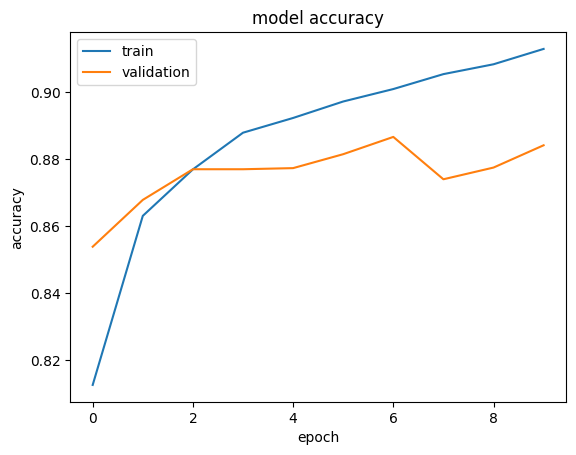

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Overfits too quickly - resolve by

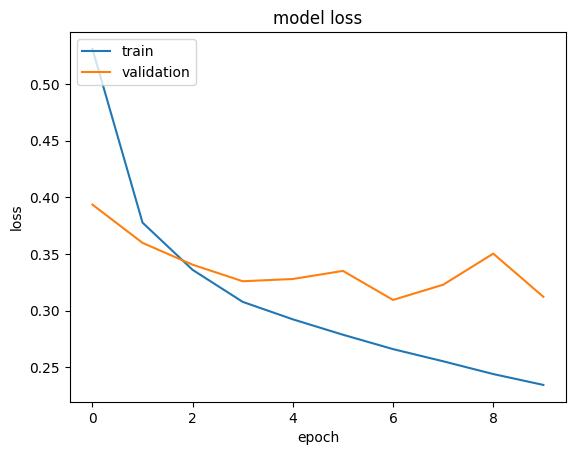

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Display the model performance on the test set**

<br>
X_test include the new digit images the model has never seen
<br>
y_test include the correct labels of the test set

In [23]:
# Display the test set accuracy and loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
# Print out the accuracy
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8772 - loss: 0.3441
Test accuracy: 0.8805000185966492


**Make predictions**

Store the predictions for all images in the test dataset:

In [24]:
# Make predictions using the model
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Display the probabilities in the prediction of the first image. Each number in the numpy array is the probability correspond to the 10 classes

In [25]:
# See the results (shown as probability) from the first image
predictions[0] #222 for a false prediction

array([1.29754524e-04, 6.85825944e-05, 2.62526228e-05, 1.90462868e-06,
       2.95815873e-04, 2.18733195e-02, 1.14065464e-04, 6.43900856e-02,
       2.74514332e-06, 9.13097441e-01], dtype=float32)

Display the label that is prediced with the highest probability:

In [26]:
# From all the probabilities the model gave us, we will select the highest one to be our final results
# argmax() will help us do that
np.argmax(predictions[0])

np.int64(9)

Confirm whether the prediction is correct by checking the actual label of the first image:

In [27]:
# Display the actual label for the first test image
# check prediction
class_names[test_labels[0]], class_names[np.argmax(predictions[0])]

('Ankle boot', 'Ankle boot')

**Define two helper functions (we will use the functions later when plotting the results)**

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Display the 1st image, its predicted label with the probability and its true label:

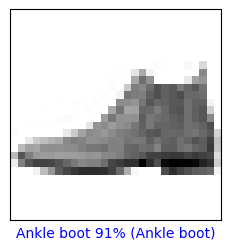

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions,  test_labels)
#BLUE IF CORRECT

Display the plot of all predicted probabilities for the 1st image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


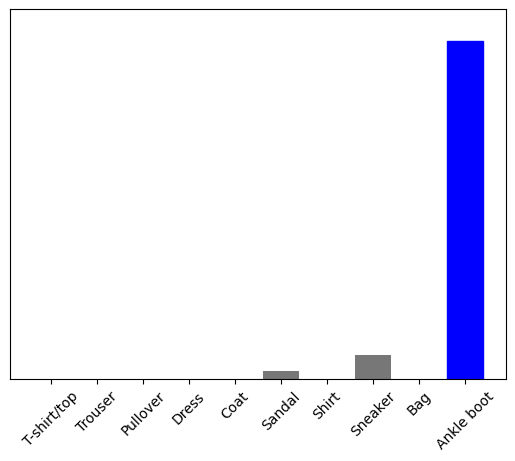

In [30]:
plot_value_array(0, model.predict(np.expand_dims(test_images[0],0)), test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Display the 223rd image, its predicted label with the probability and its true label:

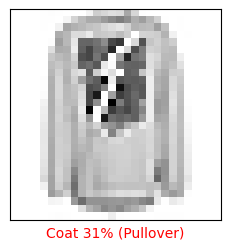

In [31]:
i = 222
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions,  test_labels)

Display the plot of all predicted probabilities for the 223rd image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


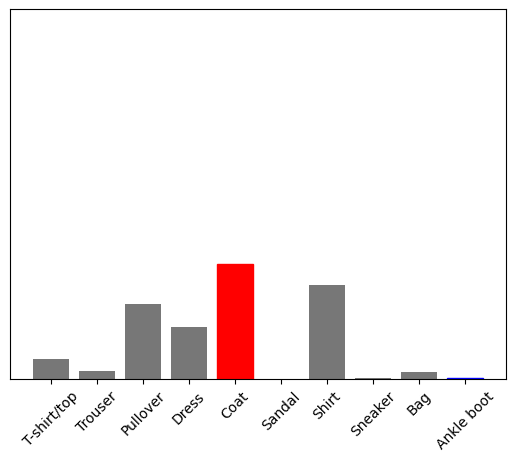

In [32]:
plot_value_array(0, model.predict(np.expand_dims(test_images[222],0)), test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Plot several images with their predictions (correct prediction labels are blue and incorrect ones are red):

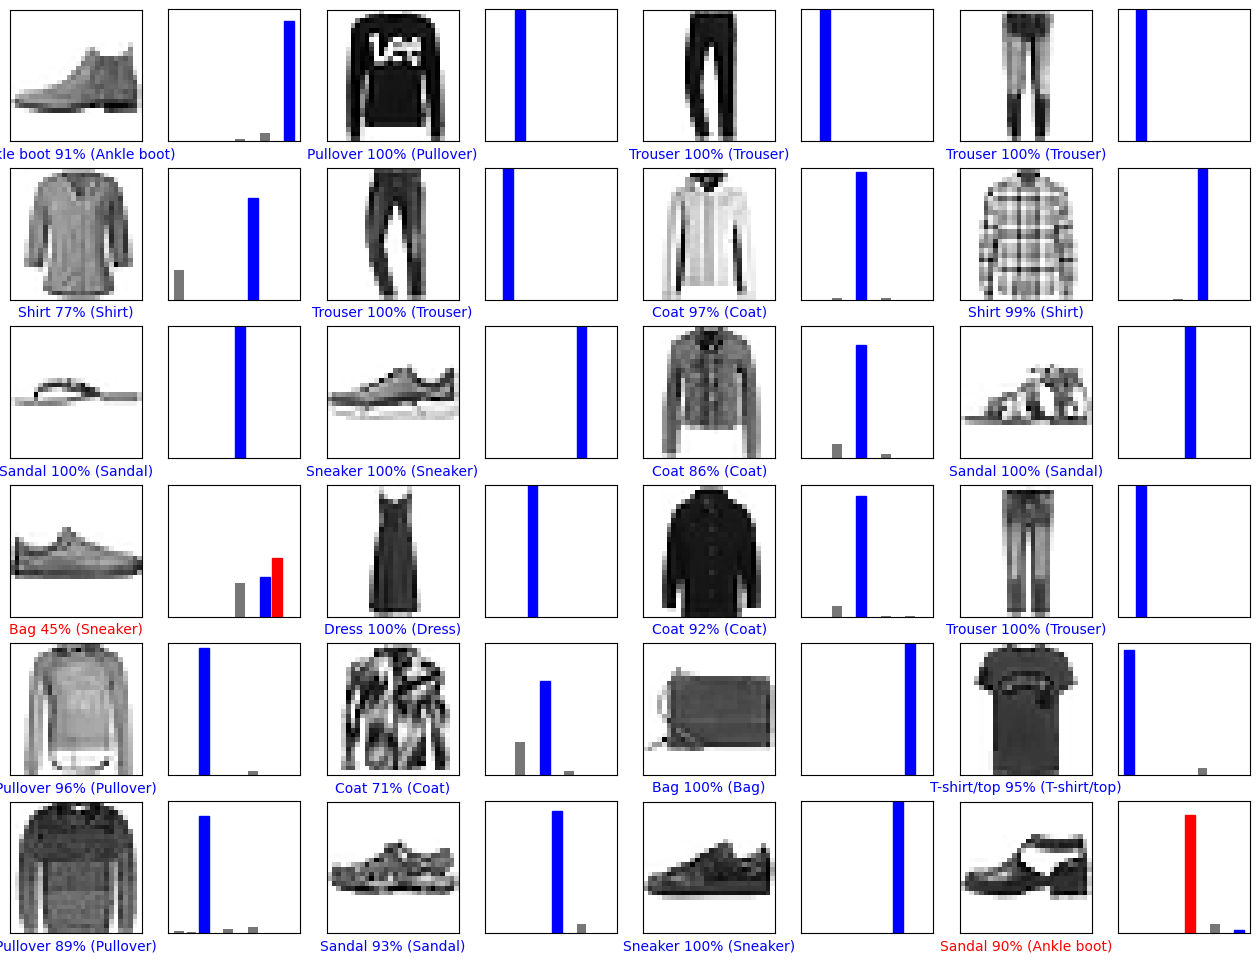

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


#[Step 4] **DISCUSS**: What to do next?

You will test different neural network structures, train and evaluate the model, and report the **Test accuracy** each time. Test accuracy is reported in the **"Evaluate the model"** step. Follow instructions from the assignment.

---

# Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.